In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, log_loss, confusion_matrix, recall_score

In [2]:
df = pd.read_csv('Telecom.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

In [6]:

df.select_dtypes(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [7]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

In [8]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [9]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [10]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

/tmp/ipython-input-2840544469.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [11]:
df['tenure'].mean().round()

np.float64(32.0)

In [12]:
df['MonthlyCharges'].mean().round()

np.float64(65.0)

In [13]:
df['TotalCharges'].mean().round()

np.float64(2282.0)

In [14]:
df['Contract'].value_counts(normalize=True).round(3)

,proportion
Contract,
Month-to-month,0.550
Two year,0.241
One year,0.209


In [15]:
df['InternetService'].value_counts(normalize=True).round(3)

,proportion
InternetService,
Fiber optic,0.440
DSL,0.344
No,0.217


In [16]:
df['Churn'].value_counts(normalize=True).round(3)

,proportion
Churn,
No,0.735
Yes,0.265


In [17]:
df.groupby('Churn').value_counts()


Churn  customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling  PaymentMethod              MonthlyCharges  TotalCharges
No     0002-ORFBO  Female  0              Yes      Yes         9       Yes           No             DSL              No                   Yes                  No                   Yes                  Yes                  No                   One year        Yes               Mailed check               65.60           593.30          1
       0003-MKNFE  Male    0              No       No          9       Yes           Yes            DSL              No                   No                   No                   No                   No                   Yes                  Month-to-month  No                Mailed check               59.90           542.40          1
       0013-MHZWF  Female  0              No       Yes         9       Yes           No             DSL              No                   No                   No                   Yes                  Yes                  Yes                  Month-to-month  Yes               Credit card (automatic)    69.40           571.45          1
       0013-SMEOE  Female  1              Yes      No          71      Yes           No             Fiber optic      Yes                  Yes                  Yes                  Yes                  Yes                  Yes                  Two year        Yes               Bank transfer (automatic)  109.70          7904.25         1
       0014-BMAQU  Male    0              Yes      No          63      Yes           Yes            Fiber optic      Yes                  No                   No                   Yes                  No                   No                   Two year        Yes               Credit card (automatic)    84.65           5377.80         1
                                                                                                                                                                                                                                                                                                                                               ..
Yes    9961-JBNMK  Male    1              No       No          21      Yes           No             Fiber optic      No                   No                   Yes                  No                   Yes                  Yes                  Month-to-month  Yes               Bank transfer (automatic)  96.80           2030.30         1
       9965-YOKZB  Male    1              No       No          9       Yes           Yes            Fiber optic      No                   No                   No                   No                   No                   Yes                  Month-to-month  Yes               Electronic check           83.85           790.15          1
       9985-MWVIX  Female  0              No       No          1       Yes           No             Fiber optic      No                   No                   No                   No                   No                   No                   Month-to-month  Yes               Mailed check               70.15           70.15           1
       9986-BONCE  Female  0              No       No          4       Yes           No             No               No internet service  No internet service  No internet service  No internet service  No internet service  No internet service  Month-to-month  No                Bank transfer (automatic)  20.95           85.50           1
       9992-RRAMN  Male    0              Yes      No          22      Yes           Yes            Fiber optic      No                   No                   No                   No                   No                   Yes                  Month-to-month  Yes               Electronic

In [18]:
df[df['tenure'] < 3].value_counts().sum()

np.int64(862)

In [19]:
df[df['MonthlyCharges'] > 100].value_counts().sum()

np.int64(902)

In [20]:
df.groupby('Contract') ['TotalCharges'].mean().round()

,TotalCharges
Contract,
Month-to-month,1369.0
One year,3034.0
Two year,3715.0


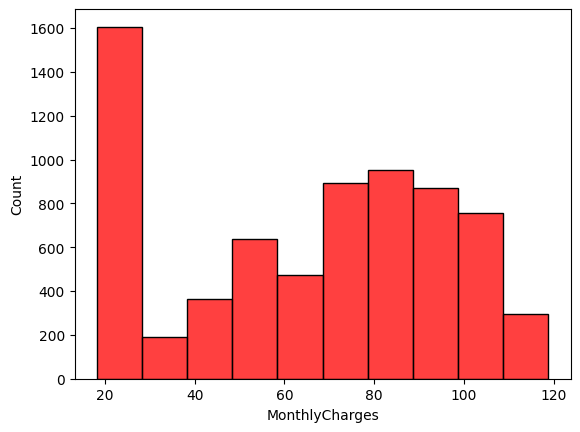

In [21]:
sns.histplot(df['MonthlyCharges'], bins=10, color='red')
plt.show()

<Axes: xlabel='tenure', ylabel='Count'>

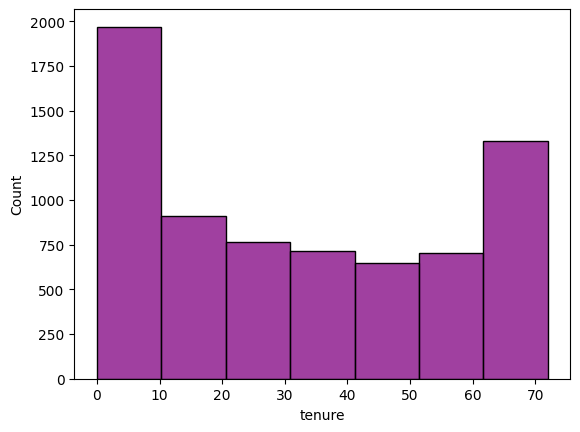

In [22]:
sns.histplot(data=df, x='tenure', bins=7, color='purple')

<Axes: xlabel='TotalCharges', ylabel='Count'>

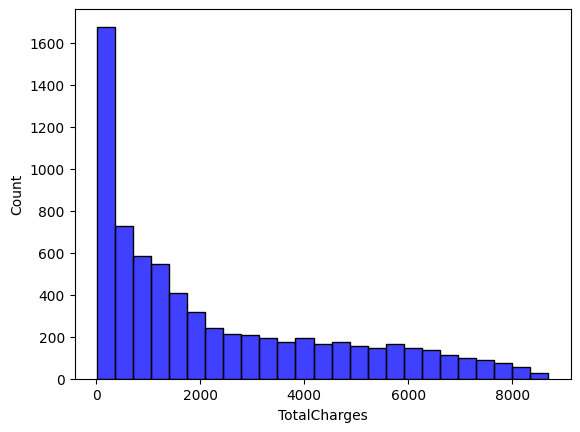

In [23]:
sns.histplot(data=df, x='TotalCharges', bins=25, color='blue')

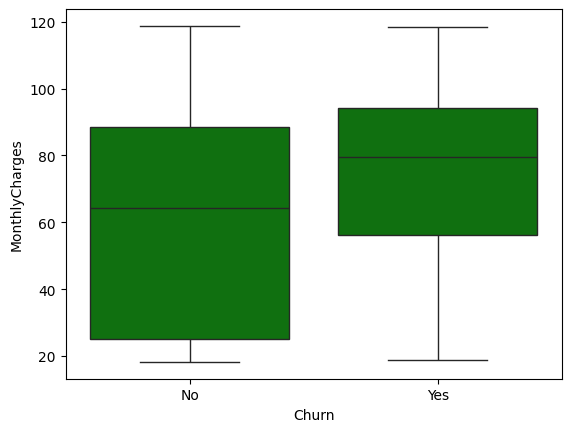

In [24]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', color='green')
plt.show()

<Axes: xlabel='Churn', ylabel='Contract'>

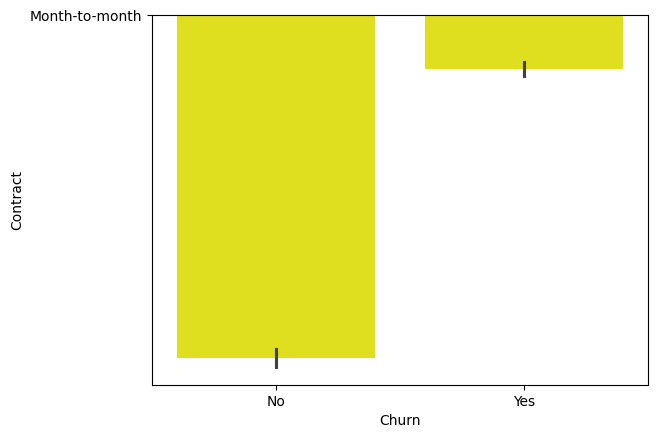

In [25]:
sns.barplot(data=df, x ='Churn', y='Contract', color='yellow')

In [26]:
corr = df.corr(numeric_only=True)

<Axes: >

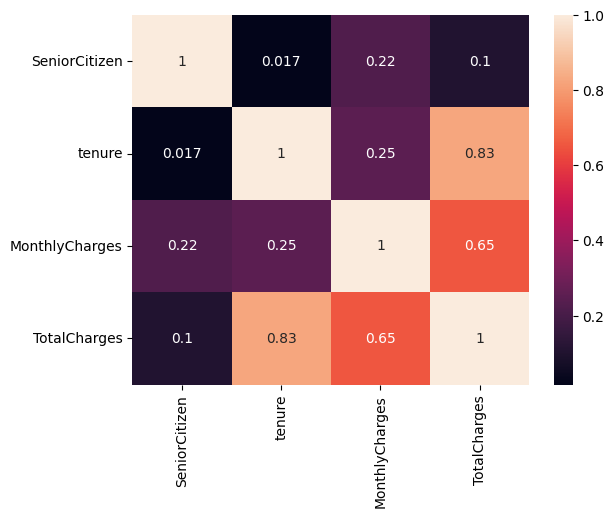

In [27]:
sns.heatmap(corr, annot=True)

In [28]:
num_df = df.select_dtypes(include=['int64', 'float64'])
num_df['Churn'] = df['Churn']


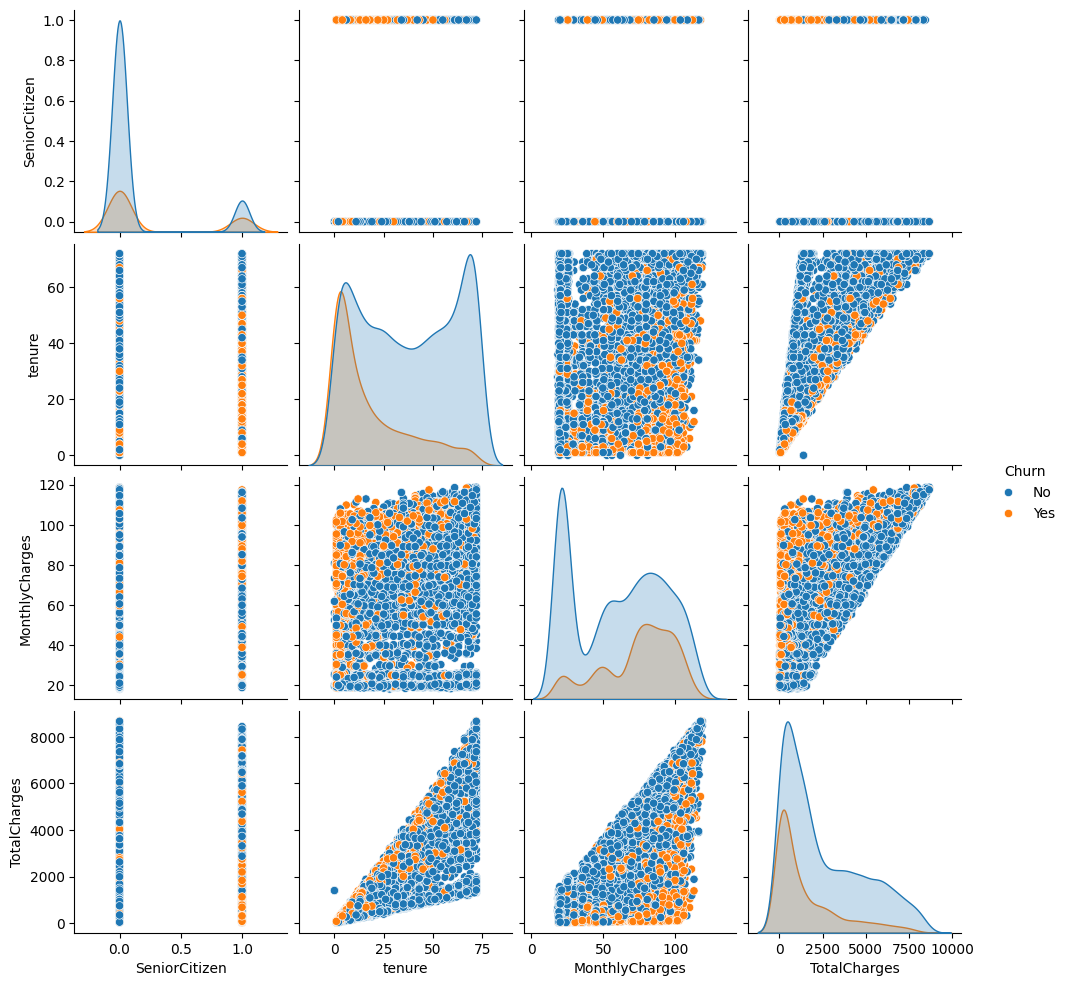

In [29]:
sns.pairplot(num_df, hue='Churn')

In [30]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [31]:
df.columns == ' '

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [32]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [33]:
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})

In [34]:
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})

In [35]:
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})

In [36]:
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})

In [37]:
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

In [38]:
df.drop('customerID', axis=1, inplace=True)

In [39]:
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service', 'No')

In [40]:
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service', 'No')

In [41]:
df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service', 'No')

In [42]:
df['TechSupport'] = df['TechSupport'].replace('No internet service', 'No')

In [43]:
df['StreamingTV'] = df['StreamingTV'].replace('No internet service', 'No')

In [44]:
df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service', 'No')

In [45]:
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 0, })

In [46]:
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 0})

In [47]:
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 0})

In [48]:
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0})

In [49]:
df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0})

In [50]:
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0})

In [51]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [53]:
df = pd.get_dummies(df, columns=['PaymentMethod','Contract', 'InternetService', 'MultipleLines'], drop_first=True).astype(int)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = df.drop(columns=('Churn'))
scaled_data = scaler.fit_transform(features)

In [55]:
x = scaled_data
y = df['Churn']

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [57]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [58]:
y_pred = log_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8204400283889283

In [59]:
precision_score(y_test, y_pred)

0.6840490797546013

In [60]:
recall_score(y_test, y_pred)

0.5978552278820375

In [61]:
f1_score(y_test, y_pred)

0.6380543633762518

In [62]:
confusion_matrix(y_test, y_pred)

array([[933, 103],
       [150, 223]])

In [63]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [64]:
y_pred = tree_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.7253371185237757

In [65]:
precision_score(y_test, y_pred)

0.48

In [66]:
recall_score(y_test, y_pred)

0.450402144772118

In [67]:
f1_score(y_test, y_pred)

0.46473029045643155

In [68]:
confusion_matrix(y_test, y_pred)

array([[854, 182],
       [205, 168]])

In [69]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes'],
      dtype='object')

In [70]:
df.rename(columns={'PaymentMethod_Credit card (automatic)': 'PaymentMethod_Credit_card_automatic' ,
                   'PaymentMethod_Electronic check':'PaymentMethod_Electronic_check',
                   'PaymentMethod_Mailed check':'PaymentMethod_Mailed_check',
                   'Contract_One year':'Contract_One_year', 'Contract_Two year':'Contract_Two_year',
                   'InternetService_Fiber optic':'InternetService_Fiber_optic',
                   'MultipleLines_No phone service':'MultipleLines_No_phone_service'}, inplace=True)

In [73]:
import joblib
joblib.dump(log_model, 'modelp.pkl')
joblib.dump(scaler, 'scalerp.pkl')

['scalerp.pkl']

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   gender                               7043 non-null   int64
 1   SeniorCitizen                        7043 non-null   int64
 2   Partner                              7043 non-null   int64
 3   Dependents                           7043 non-null   int64
 4   tenure                               7043 non-null   int64
 5   PhoneService                         7043 non-null   int64
 6   OnlineSecurity                       7043 non-null   int64
 7   OnlineBackup                         7043 non-null   int64
 8   DeviceProtection                     7043 non-null   int64
 9   TechSupport                          7043 non-null   int64
 10  StreamingTV                          7043 non-null   int64
 11  StreamingMovies                      7043 non-null   int